# 統計の基礎知識・統計モデルの演習課題

1. 推定・検定について学習します。(10問)
2. 相関・回帰について学習します。(12問)
3. 回帰分析について学習します。(13問)
4. ロジスティック分析について学習します。(10問)

## 1. 推定・検定について学習します。(10問)

### 1.1 ある工場で生産された10個の製品の長さを測るとそれぞれ次のようになりました。次のコードを実行して、それらの長さ(cm)を確かめてください。

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
product_length = np.array([101.0, 103.1, 99.0, 101.9, 100.4, 99.5, 101.5, 100.5, 98.8, 100.9])
product_length

array([101. , 103.1,  99. , 101.9, 100.4,  99.5, 101.5, 100.5,  98.8,
       100.9])

### 1.2 10個の製品の長さの平均値と、不偏標準偏差を算出してください。

In [2]:
print(f'平均: {np.mean(product_length)}')
print(f'不偏分散の平方根: {np.std(product_length, ddof=1)}')
np.sqrt(stats.tvar(product_length))

平均: 100.66
不偏分散の平方根: 1.3343329586143198


1.3343329586143198

### 1.3 これらの製品の長さは正規分布に従うとします。この時、製品の長さの平均値の95%信頼区間を算出してください。

In [5]:
n = len(product_length)
product_mean = np.mean(product_length)
product_var = stats.tvar(product_length)
print(stats.norm.interval(0.95, loc=product_mean, scale=np.sqrt(product_var / n))) # 正規分布の方が区間推定が厳しくなる
print(stats.t.interval(0.95, loc=product_mean, scale=np.sqrt(product_var/n), df=n-1)) # t分布

(99.8329870608106, 101.4870129391894)
(99.70547570321511, 101.61452429678488)


### 1.4 これらの製品の長さの平均値は100cmであると考えてもいいのでしょうか。これを検定するにあたって立てる帰無仮説・対立仮説を記述して表示してください。

In [6]:
print('帰無仮説: 平均値は100cmである(μ=100)')
print('対立仮説: 平均値は100cmではない(μ≠100)')

帰無仮説: 平均値は100cmである(μ=100)
対立仮説: 平均値は100cmではない(μ≠100)


### 1.5 1.4で立てた帰無仮説をもとに適切な検定方法を用いて有意水準5%で検定してください。また、検定結果のp値を表示してください。

In [10]:
t, p = stats.ttest_1samp(product_length, popmean=100, alternative='two-sided')
print(f"t値: {t},  p値: {p}")

t値: 1.564154765298264,  p値: 0.15221974534157642


### 1.6 1.5で得られた結果からわかることを記述して表示してください。

In [11]:
print('p値: ', p)
a = 0.05
# p値が有意水準5％を下回ると帰無仮説を棄却
print(a > p)
print('帰無仮説を棄却できず平均値は100ではないと否定できない')

p値:  0.15221974534157642
False
帰無仮説を棄却できず平均値は100ではないと否定できない


### 1.7 ある男女10人ずつにある学力検査をさせると、結果は次のようになりました。次のコードを実行して、結果を確認してください。

In [12]:
df = pd.DataFrame({'男': [20.4, 23.3, 21.5, 22.4, 23.9, 22.2, 20.0, 20.7, 22.9, 21.5],
                    '女': [19.2, 20.9, 21.0, 19.0, 22.0, 18.8, 20.2, 19.5, 20.0, 19.4]})

df

/bin/bash: pipinstall: command not found


,男,女
0,20.4,19.2
1,23.3,20.9
2,21.5,21.0
3,22.4,19.0
4,23.9,22.0
5,22.2,18.8
6,20.0,20.2
7,20.7,19.5
8,22.9,20.0
9,21.5,19.4


### 1.8 この結果から、学力検査の結果に男女差があるかを検定します。どのような帰無仮説と対立仮説を立てるか、記述して表示してください。

In [13]:
print('帰無仮説: 男女の学力に差がない（男女の平均値に差はない）')
print('対立仮説: 男女の学力に差がある(男女の平均値に差はある)')

帰無仮説: 男女の学力に差がない（男女の平均値に差はない）
対立仮説: 男女の学力に差がある(男女の平均値に差はある)


### 1.9 学力検査の結果は正規分布に従うとします。この時、1.8で立てた仮説をもとに、等分散性を仮定せずに有意水準5%で検定を行なってください。また、検定結果のp値を表示してください。

In [14]:
# 正規分布で等分散性を担保しない >>> ウェルチのt検定
male_ability = df['男']
female_ability = df['女']
print(np.mean(df['男']))
print(np.mean(df['女']))
#　np.mean(df['男'])とnp.mean(df['女'])の差は統計的に優位であるか
t, p = stats.ttest_ind(male_ability, female_ability, equal_var=False, alternative='two-sided')
print('p値: ', p)

21.88
20.0
p値:  0.0021488395200926777


### 1.10 1.9で得られた結果から何がわかるかを記述して表示してください。

In [15]:
# 有意水準5％ > p値　: 帰無仮説を棄却
a = 0.05
print(a > p)
print('帰無仮説を棄却する(男女の学力の結果に差があるといえる)')

True
帰無仮説を棄却する(男女の学力の結果に差があるといえる)


## 2. 相関・回帰について学習します。(12問)

### 2.1 次のデータは、2009年・2010年のビールの売り上げ箱数と月平均気温に関するデータです。次のコードを実行して、結果を確認してください。
> 出典: アサヒ: 「月次販売データ」https://www.asahibeer.co.jp/ir/monthlydata/index.html

> ・気象庁: 「2010年の月毎の気候」(http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s1.php?prec_no=44&block_no=47662&year=2010&month=&day=&view=)

> ・気象庁: 「2009年の月毎の気候」(http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s1.php?prec_no=44&block_no=47662&year=2009&month=&day=&view=)

In [16]:
beer_sale = [5107, 7267, 8706, 10170, 9760, 12001, 12980, 11939, 9175, 9177, 9066, 15626, 4693, 6426, 8661, 9769, 8655, 12370, 12678, 11740, 9160, 8370, 9494,14638]
temperature = [6.8, 7.8, 10.0, 15.7, 20.1, 22.5, 26.3, 26.6, 23.0, 19.0, 13.5, 9.0, 7.0, 6.5, 9.1, 12.4, 19.0, 23.6, 28.0, 29.6, 25.1, 18.9, 13.5, 9.9]

df_beer = pd.DataFrame({'平均気温': temperature, '売上箱数': beer_sale},
                          index=[str(date)[:7] for date in np.arange('2009-01', '2011-01', dtype='datetime64[M]')])

df_beer

,平均気温,売上箱数
2009-01,6.8,5107
2009-02,7.8,7267
2009-03,10.0,8706
2009-04,15.7,10170
2009-05,20.1,9760
2009-06,22.5,12001
2009-07,26.3,12980
2009-08,26.6,11939
2009-09,23.0,9175
2009-10,19.0,9177


### 2.2 気温によって売り上げ箱数が変化するのでしょうか。横軸に平均気温、縦軸に売り上げ箱数をとった散布図を描画することで関係を可視化してください。

In [17]:
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from scipy import stats
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=4b57d0b686728873df3a8dffd88bb2c3d74a2cf6ba0a4fbe5791d1902b183101
  Stored in directory: /root/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize-matplotlib


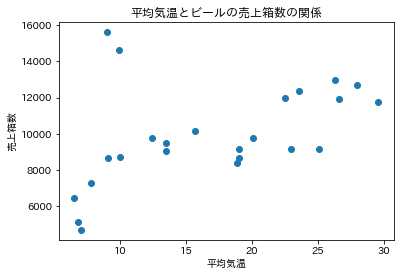

In [18]:
plt.scatter('平均気温', '売上箱数', data=df_beer)
plt.xlabel('平均気温')
plt.ylabel('売上箱数')
plt.title('平均気温とビールの売上箱数の関係')
plt.show()

### 2.3 次は変数間の相関関係を定量的に判定します。変数間の相関係数を算出して表示してください。

In [19]:
correlation, p = stats.pearsonr(df_beer['平均気温'], df_beer['売上箱数'])
print(correlation)

0.4587063549301076


相関係数で考えると、平均気温とビールの売上にそれほど相関があるとは言えません。

### 2.4 次は、平均気温を用いてビールの売上箱数を予測することを考えます。平均気温を説明変数、売上箱数を目的変数として、線形回帰を行なってください。また、切片と説明変数の係数を表示してください。

In [20]:
from sklearn.linear_model import LinearRegression
x = df_beer[['平均気温']].values
y = df_beer['売上箱数'].values
lr = LinearRegression()
lr.fit(x, y)
print(f"intercept: {lr.intercept_}")
print(f"coefficient: {lr.coef_[0]}")

intercept: 7152.104649120409
coefficient: 163.75648652546582


### 2.5 2.4で作成したモデルを用いて、2.2と同様の散布図にモデルから得られた回帰直線を重ねて描画してください。

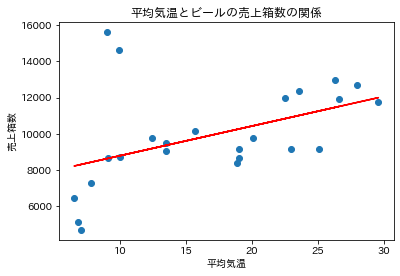

In [22]:
y_pred = lr.predict(x)
plt.scatter('平均気温', '売上箱数', data=df_beer)
plt.xlabel('平均気温')
plt.ylabel('売上箱数')
plt.title('平均気温とビールの売上箱数の関係')
plt.plot(x, y_pred, color='r')
plt.show()

###2.6 RMSEを算出して表示してください。

In [23]:
from sklearn.metrics import mean_squared_error
print('RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
# mean_squared_error(y, pred, squared=False)

RMSE:  2357.985589431331


### 2.7 2.5で描画した散布図を見ると、外れ値が確認できます。次のコードを実行すると、それぞれの点の周囲の10個の点からの距離から、それぞれの点が外れ値かどうかを判定することができます。次のコードを実行して、その結果を確認してください。

In [24]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=10, contamination=0.2)

# 正常値の値を格納したDataFrame
df_beer_in = df_beer.loc[lof.fit_predict(df_beer.values) > 0, :]
display(df_beer_in)

# 異常値の値を格納したDataFrame
df_beer_out = df_beer.loc[lof.fit_predict(df_beer.values) < 0, :]
display(df_beer_out)

,平均気温,売上箱数
2009-02,7.8,7267
2009-03,10.0,8706
2009-04,15.7,10170
2009-05,20.1,9760
2009-06,22.5,12001
2009-07,26.3,12980
2009-08,26.6,11939
2009-09,23.0,9175
2009-10,19.0,9177
2009-11,13.5,9066


,平均気温,売上箱数
2009-01,6.8,5107
2009-12,9.0,15626
2010-01,7.0,4693
2010-02,6.5,6426
2010-12,9.9,14638


12月はお歳暮・お年賀によって売り上げが上昇していると考えられるため、気温の割には売上箱数が多く外れ値と判断されました。

### 2.8 2.7で正常値と外れ値をそれぞれ分別することができました。次は、2.6で作成したDataFrameを用いて、正常値と外れ値をそれぞれ重ねて散布図として描画してください。

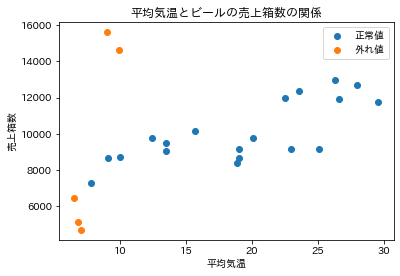

In [25]:
plt.scatter('平均気温', '売上箱数', data=df_beer_in, label='正常値')
plt.scatter('平均気温', '売上箱数', data=df_beer_out, label='外れ値')
plt.xlabel('平均気温')
plt.ylabel('売上箱数')
plt.title('平均気温とビールの売上箱数の関係')
plt.legend()

たしかに、外れ値と思われる値が除外されていることがわかります。

### 2.9 2.8より外れ値が除外されました。次は、正常値のみを用いて相関係数を算出して表示してください。

In [26]:
correlation_in, p = stats.pearsonr(df_beer_in['平均気温'], df_beer_in['売上箱数'])
print(correlation_in)

0.749537440885372


相関係数で考えると、平均気温とビールの売上には相関があると言えそうです。

### 2.10 2.9で相関係数が大幅に増加しました。次は、正常値のみを用いて線形回帰モデルを作成してください。また、モデルから算出される切片と回帰係数を表示してください。

In [27]:
X_ = df_beer_in[['平均気温']].values
y_ = df_beer_in['売上箱数'].values
lr = LinearRegression()
lr.fit(X_, y_)
print(f"intercept: {lr.intercept_}")
print(f"coefficient: {lr.coef_[0]}")

intercept: 6458.054526841079
coefficient: 188.16322240863207


### 2.11 2.10で作成したモデルを用いて、正常データにおける回帰直線を散布図と重ねて描画してください。

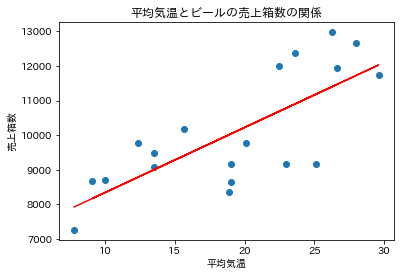

In [28]:
y_pred_in = lr.predict(X_)
plt.scatter('平均気温', '売上箱数', data=df_beer_in)
plt.xlabel('平均気温')
plt.ylabel('売上箱数')
plt.title('平均気温とビールの売上箱数の関係')
plt.plot(X_, y_pred_in, color='r')
plt.show()

可視化して確認すると、平均気温とビールの売上の箱数にはある程度の相関があると言えそうです。

### 2.12 正常値のみを用いた回帰モデルにおいてRMSEを算出し、表示してください。

In [29]:
print('RMSE: ', mean_squared_error(y_, y_pred_in, squared=False))

RMSE:  1085.8738120490075


## 3. 回帰分析について学習します。(13問)

### 3.1 次のデータは、糖尿病患者に関するデータで、`X`に説明変数、`y`に目的変数が格納されています。また、DataFrameの`target`列がその目的変数です。次のコードを実行して、データを確認してください。

In [1]:
# こちらのセルを実行してください。
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

df_diabetes = pd.DataFrame(X, columns=diabetes.feature_names)
df_diabetes['target'] = y
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


- age: 年齢
- sex: 性別
- bmi: ボディマス指数
- bp: 平均血圧
- s1: 総血清コレステロール
- s2: 低密度リポタンパク質
- s3: 高密度リポタンパク質
- s4: 総コレステロール/ HDL
- s5: おそらく血清トリグリセリドレベルの対数
- s6: 血糖値
- target: 糖尿病の進行具合

### 3.2 `statsmodels`ライブラリを用いて、3.1の説明変数を用いた目的変数に対する線形回帰を行なってください。回帰の際には切片を考慮してください。その後、`summary`関数を用いることで結果を表示してください。

In [31]:
import statsmodels.api as sm
x1 = sm.add_constant(df_diabetes.iloc[:, :10].values)
y1 = df_diabetes['target'].values
model = sm.OLS(y1, x1)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.83e-62
Time:                        13:55:31   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
x1           -10.0099     59.749     -0.168      0.867    -127.446     107.426
x2          -239.8156     61.222     -3.917      0.000    -360.147    -119.484
x3           519.8459     66.533      7.813      0.000     389.076     650.616
x4           324.3846     65.422      4.958      0.000     195.799     452.970
x5          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
x6           476.7390    339.030      1.406      0.160    -189.620    1143.098
x7           101.0433    212.531      0.475      0.635    -316.684     518.770
x8           177.0632    161.476      1.097      0.273    -140.315     494.441
x9           751.2737    171.900      4.370      0.000     413.407    1089.140
x10           67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.3 回帰分析の目的は、各説明変数の係数を見ることで、目的変数に対する説明変数の影響を確認することです。それでは、各説明変数に対する係数を棒グラフで可視化してください。

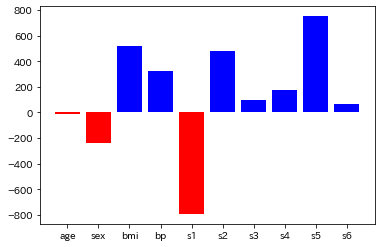

In [32]:
import matplotlib.pyplot as plt
x_label = df_diabetes.iloc[:, :10].columns
y_label = res.params[1:]
c = [('b' if i > 0 else 'r') for i in y_label]
plt.bar(x_label, y_label, color=c)
plt.show()

この結果を確認すると、`bmi`や`bp`、`s5`の値が大きければ糖尿病が進行していて、逆に`s1`の値が低いほど糖尿病が進行していると考えることができます。

### 3.4 次に、各説明変数の係数の絶対値を取って、3.3と同様に描画してください。

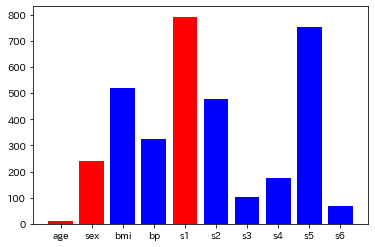

In [33]:
plt.bar(x_label, abs(y_label), color=c)
plt.show()

これを見ると、変数の重要度としては`s1`, `s5`, `bmi`などが重要であると考えることができます。

### 3.5 3.2で作成したモデルを用いて予測される値のMAEを算出して表示してください。

In [34]:
from statsmodels.tools.eval_measures import meanabs
# df_diabetes.iloc[:, :10].shape
pred_sm = res.predict(x1)
mae = meanabs(y1, pred_sm)
print('MAE', mae)

MAE 43.27745202531506


### 3.6 3.2の結果を確認すると、多重共線性の指標となる`Cond. No.`の値が少し大きいように見えます。`statsmodels`モジュールを用いて、各説明変数のVIFを算出してDataFrameとして表示してください。

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(df_diabetes.iloc[:, :10].values, i) for i in range(len(df_diabetes.iloc[:, :10].columns))]
vif_df = vif_df.set_index(df_diabetes.iloc[:, :10].columns)
vif_df

,VIF
age,1.217307
sex,1.278071
bmi,1.509437
bp,1.459428
s1,59.202510
s2,39.193370
s3,15.402156
s4,8.890986
s5,10.075967
s6,1.484623


### 3.7 3.6の結果を確認すると、VIFの値がかなり大きい説明変数がいくつか見られます。それに対処するために、は主成分分析を行い相関関係が強い変数同士をまとめるという方法があります。そこで、説明変数に対して主成分分析を行い、次元数を4つに落としてください。また、次元削減後の説明変数を表示してください。

In [36]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(df_diabetes.iloc[:, :10].values)
# 次元削減後のデータに変換
decomposed = pca.transform(df_diabetes.iloc[:, :10].values)
decomposed

array([[ 0.02793021, -0.09260136,  0.02802565, -0.00393914],
       [-0.13468668,  0.06526327,  0.00132849, -0.02235602],
       [ 0.01294384, -0.07776432,  0.03516224, -0.03764745],
       ...,
       [-0.00976067, -0.05733918,  0.02360117, -0.06437324],
       [ 0.03295652,  0.00999473, -0.04132099,  0.07690302],
       [-0.09056122,  0.18910841, -0.0022992 , -0.01049425]])

### 3.8 3.7で作成した説明変数を用いて、3.2と同様の線形回帰を行なってください。

In [37]:
df_pca=pd.DataFrame(decomposed,columns=[f"x{i+1}" for i in range(len(decomposed[0]))])
df_pca['target'] = y
# df_pca
x2 = sm.add_constant(df_pca.iloc[:, :4])
model_ = sm.OLS(df_pca['target'].values, x2)
res_ = model_.fit()
res_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     109.4
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.62e-64
Time:                        13:56:13   Log-Likelihood:                -2393.8
No. Observations:                 442   AIC:                             4798.
Df Residuals:                     437   BIC:                             4818.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.604     58.424      0.000     147.016     157.251
x1           448.1948     27.290     16.423      0.000     394.559     501.831
x2          -256.7489     44.814     -5.729      0.000    -344.827    -168.671
x3           238.2413     49.851      4.779      0.000     140.263     336.220
x4           593.1035     56.006     10.590      0.000     483.029     703.178
==============================================================================
Omnibus:                        4.384   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.180
Skew:                           0.044   Prob(JB):                        0.204
Kurtosis:                       2.594   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.9 多重共線性に対処するために主成分分析を行うと、各説明変数が統合され、解釈性が落ちるという欠点があります。そこで別の方法として、L1正則化を行うことでいくつかの変数の係数を0にする方法もあります。それでは、`statsmodels`モジュールを用いて、L1正則化を用いたLasso回帰を行なってください。学習の際に`alpha`引数は1.0に指定してください。また、その結果得られた各変数の係数を表示してください。

In [38]:
sml1 = sm.OLS(y1, x1).fit_regularized(alpha=1)
sml1.params

array([151.13348416,   0.        ,   0.        , 367.70162582,
         6.30970264,   0.        ,   0.        ,   0.        ,
         0.        , 307.60214746,   0.        ])

### 3.10 3.9で得られた各説明変数の係数を3.3と同様に可視化してください。

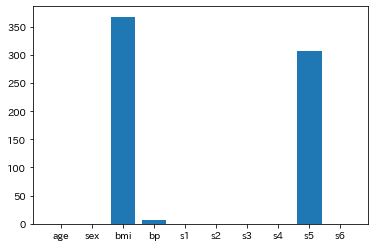

In [39]:
plt.bar(df_diabetes.iloc[:, :10].columns, sml1.params[1:])
plt.show()

### 3.11 3.9で作成したモデルを用いて予測される値のMAEを算出してください。

In [40]:
pred = sml1.predict(x1)
mae = meanabs(y1, pred)
print('MAE', mae)

MAE 52.48840206825258


3つ以外の説明変数を全て削除してしまったため、MAEが大幅に増加しました。

### 3.12 3.9では、正則化によって説明変数が3つしか残りませんでした。そこで、次は`alpha`引数に0.1を指定して3.9と同様の学習を行なってください。また、その後各説明変数の結果を3.10と同様に可視化してください。

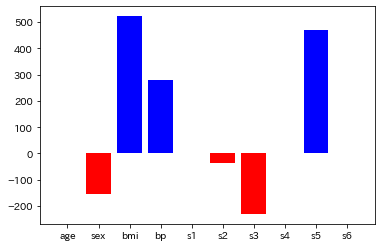

In [41]:
sml2 = sm.OLS(y1, x1).fit_regularized(alpha=0.1)
c2 = [('b' if i > 0 else 'r') for i in sml2.params[1:]]
plt.bar(df_diabetes.iloc[:, :10].columns, sml2.params[1:], color=c2)
plt.show()

これで説明変数をある程度残したまま正則化を行うことができました。

### 3.13 最後に、3.12で作成したモデルを用いてMAEを計算してください。

In [42]:
pred2 = sml2.predict(x1)
mae = meanabs(y1, pred2)
print('MAE', mae)

MAE 44.11951849747416


## 4. ロジスティック分析について学習します。(10問)

### 4.1 次のデータは、赤ワインの成分に関するデータと、それぞれの赤ワインのクオリティを数値で表したデータです。クオリティは0から10で表されているので、これを5以下・6以上にわけてそれぞれ0, 1と割り振ったものを目的変数とします。`X_wine`, `y_wine`にそれぞれ説明変数と目的変数が格納されています。

> 出典: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [43]:
# こちらのセルを実行してください。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
url = 'https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt'

urllib.request.urlretrieve(url, 'winequality_red.txt')

df_redwine = pd.read_csv('winequality_red.txt', sep='\t', index_col=0)
df_redwine['quality_binary'] = np.where(df_redwine['quality'] >=6, 1, 0)
display(df_redwine)

X_wine = df_redwine.loc[:, :'alcohol'].copy().values
y_wine = df_redwine['quality_binary'].copy().values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


各列は次の意味を持っています。
- fixed acidity : 不揮発酸濃度(ほぼ酒石酸濃度)
- volatile acidity : 揮発酸濃度(ほぼ酢酸濃度)
- citric acid : クエン酸濃度
- residual sugar : 残存糖濃度
- chlorides : 塩化物濃度
- free sulfur dioxide : 遊離亜硫酸濃度
- total sulfur dioxide : 全亜硫酸濃度
- density : 密度
- pH : pH
- sulphates : 硫酸塩濃度
- alcohol : アルコール度数
- quality : 0-10 の値で示される品質のスコア
- quality_binary : qualityが6以上のものを1, 5以下のものを0としたカテゴリ変数

### 4.2 まず、目的変数の分布を確認します。横軸に各データのインデックス、縦軸に各データの目的変数をとった散布図を描画してください。

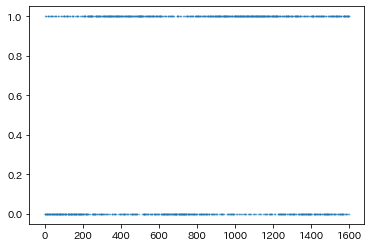

In [44]:
plt.scatter(x=df_redwine.index, y=df_redwine['quality_binary'], s=0.5, alpha=0.5)

このように、今回のデータの目的変数は1(クオリティの値が6以上)か0(クオリティの値が5以下)の2値であることがわかります。

### 4.3 今回のデータでは説明変数がスケーリングされていません。そのため、各説明変数の影響を平等に評価するには、標準化してスケールを合わせる必要があります。説明変数を標準化して、標準化した後の説明変数を表示してください。

In [45]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X_wine)
X_std

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

### 4.4 それでは、最初に`scikit-learn`による単純な線形回帰を用いてデータを学習させてください。また、学習によって得られた予測値を散布図として4.2の散布図の上に重ねて描画してください。

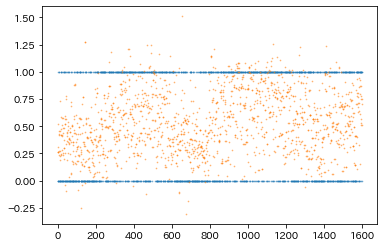

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_std, y_wine)
pred = lr.predict(X_std)
# pred
plt.scatter(x=df_redwine.index, y=df_redwine['quality_binary'], s=0.5, alpha=0.5)
plt.scatter(x=df_redwine.index, y=pred, alpha=0.5, s=0.5)

上図からわかるように、単純な線形回帰では目的関数の予測値が1を超えたり、負の値になったりする場合があります。そのため、カテゴリ変数を扱うためには線形回帰を用いた回帰分析を行うことは不適当です。そこで、このような2値のカテゴリ変数を目的関数とするデータに対しては**ロジスティック回帰分析**を行います。

### 4.5 それでは、`scikit-learn`によるロジスティック回帰モデルを用いて、4.4と同様のデータを学習させてください。学習の際には、ロジスティック回帰モデルの`random_state`引数には0を指定してください。また、`学習後のモデル.predict_proba(説明変数)`とすることで、各カテゴリに分類される確率を表示することができます。それを表示してください。

In [47]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰
model = LogisticRegression(random_state=0)
model.fit(X_std, y_wine)
model.predict_proba(X_std)

array([[0.78329305, 0.21670695],
       [0.77735336, 0.22264664],
       [0.73616533, 0.26383467],
       ...,
       [0.19978674, 0.80021326],
       [0.48603299, 0.51396701],
       [0.23421307, 0.76578693]])

今回の出力では、1列目が「クラス0である確率」、2列目が「クラス1である確率」を表しています。ロジスティック回帰ではこの値の大小によって各データの分類を行います。

### 4.6 4.5で作成した各カテゴリに分類される確率を表した配列の2列目は「クラスが1である確率」です。その列のみを取り出して、確率が小さい順にソートした後に散布図として表示してください。

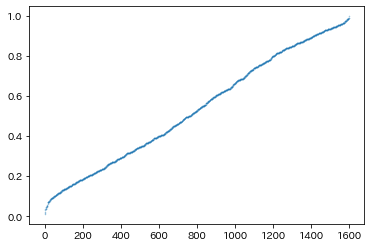

In [48]:
model_1 = model.predict_proba(X_std)[:, 1]
# model_1
sorted_model_1 = np.sort(model_1)
plt.scatter(x=df_redwine.index, y=sorted_model_1, alpha=0.4, s=0.3)

ここで確率が0.5以上のものは「1」, 確率が0.5未満のものは「0」と分類されることになります。

### 4.7 それでは、実際に学習したデータがそれぞれどちらのクラスに分類しているか予測し、結果を表示してください。

In [49]:
model.predict(X_std)

array([0, 0, 0, ..., 1, 1, 1])

このように、ロジスティック回帰では確率の概念を用いた分類を行うことができます。

### 4.8 3.3と同様に、学習から得られた各説明変数の係数を棒グラフで可視化して描画してください。

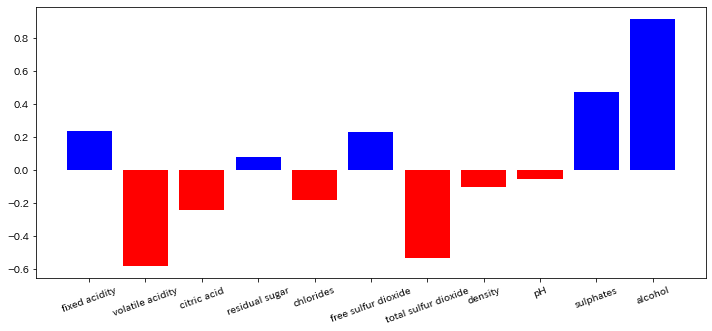

In [50]:
coef = model.coef_
coef_ = np.squeeze(coef)
c = [('b' if i > 0 else 'r') for i in coef_]
plt.figure(figsize=(12,5))
plt.bar(df_redwine.loc[:, :'alcohol'].columns, coef_, color=c)
plt.xticks(rotation=20)
plt.show()

今回の結果だと、`alchol`や`sulphates`の値が大きいとクオリティが高い傾向にあり、`volatile acidity`や`total sulfur dioxide`の値が小さいほどクオリティが高い傾向にあることがわかります。

### 4.9 3.4と同様に、学習から得られた各説明変数の係数の絶対値を取って棒グラフで可視化して描画してください。

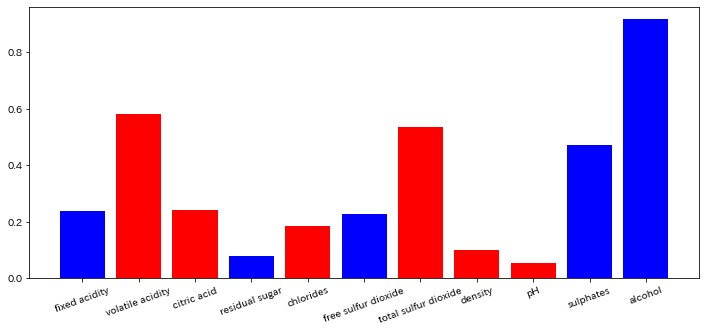

In [51]:
plt.figure(figsize=(12,5))
plt.bar(df_redwine.loc[:, :'alcohol'].columns, abs(coef_), color=c)
plt.xticks(rotation=20)
plt.show()

変数の重要度としては、`alchol`や`volatile acidity`などの重要度が高いことがわかります。




**補足**

最近は機械学習分野で「解釈性」が重んじられていることもあり、
- 決定木による可視化
- ランダムフォレストやGBDTを用いた説明変数の重要度算出
- SHAPやLIMEを用いた結果の解釈

によって説明変数の重要度算出や解釈を行うことも多くなってきました。目的に合わせて使い分けることが重要です。

### 4.10 最後に、ロジスティック回帰モデルの精度を評価します。f1値を算出して表示してください。

In [52]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_std)
print(f'F1 score: {f1_score(y_wine, y_pred)}')

F1 score: 0.7584170112226817


今回は統計的な「分析」を目的として用いましたが、「分類」をメインにする場合は、訓練データ・テストデータにわけて検証する必要があります。このように、機械学習的な「分類」にロジスティック回帰モデルを用いることもできます。